# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [40]:
data = np.genfromtxt("dataset_HW0.txt", dtype=float, delimiter=',', names=True) 
data[3]
#data[0].range

(6.08610660864, 4.49542705624, 17.0)

### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [41]:
overallMeanWeight=np.mean(data['birth_weight'],axis=0)
overallMeanFemur=np.mean(data['femur_length'],axis=0)
group1data=data[data['mother_age']<=17]
group1MeanWeight=np.mean(group1data['birth_weight'],axis=0)
group1MeanFemur=np.mean(group1data['femur_length'],axis=0)
group2data=data[(data['mother_age']>17) & (data['mother_age']<35)]
group2MeanWeight=np.mean(group2data['birth_weight'],axis=0)
group2MeanFemur=np.mean(group2data['femur_length'],axis=0)
group3data=data[data['mother_age']>=35]
group3MeanWeight=np.mean(group3data['birth_weight'],axis=0)
group3MeanFemur=np.mean(group3data['femur_length'],axis=0)
print overallMeanWeight
print group1MeanWeight
print group2MeanWeight
print group3MeanWeight
print overallMeanFemur
print group1MeanFemur
print group2MeanFemur
print group3MeanFemur

6.10407017286
5.16889979912
6.70536363695
5.83665361844
3.82759083154
3.50680640853
4.0043330551
3.79489080744


### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?

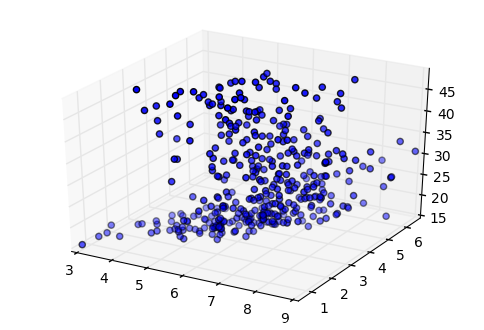

In [42]:
x = data['birth_weight']
y = data['femur_length']
z = data['mother_age']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

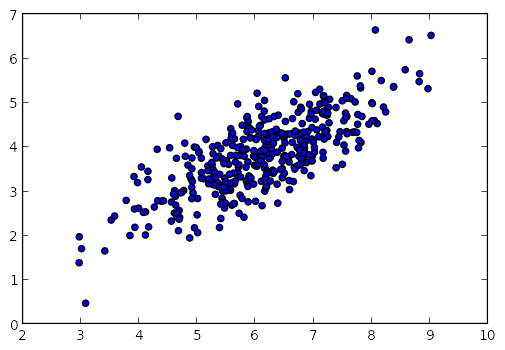

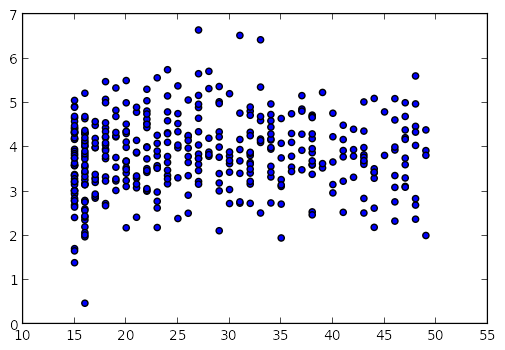

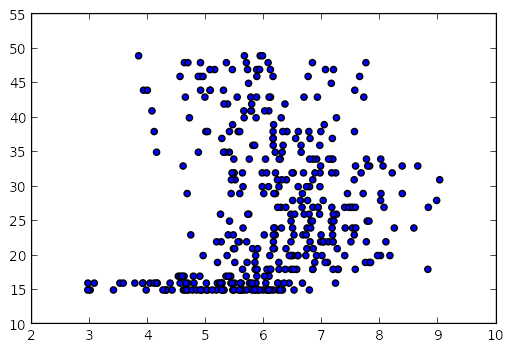

In [43]:
x = data['birth_weight']
y = data['femur_length']
plt.scatter(x, y)
plt.show()

x = data['mother_age']
y = data['femur_length']
plt.scatter(x, y)
plt.show()

x = data['birth_weight']
y = data['mother_age']
plt.scatter(x, y)
plt.show()

### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).

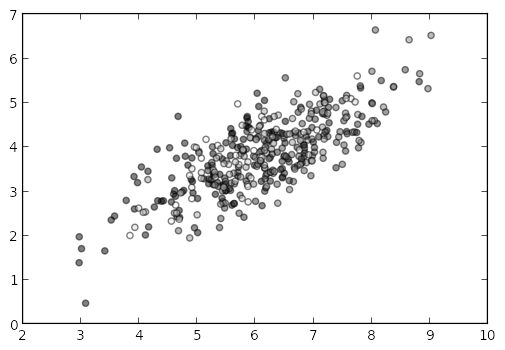

In [44]:
x = data['birth_weight']
y = data['femur_length']
colors = data['mother_age']
plt.scatter(x, y, c=colors, alpha=0.5)
plt.legend(loc='best')
plt.gray()
plt.show()

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [45]:
import urllib2 as URL
book = URL.urlopen("http://www.gutenberg.org/files/5200/5200-h/5200-h.htm")
Soup = BeautifulSoup(book, 'html.parser')
print Soup.prettify().encode('utf-8')[:1000]

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
  </meta>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

In [46]:
print Soup.head.contents
print '\n###################################\nTEXT\n###################################'
print Soup.head.text
print '\n###################################\nCHILDREN\n###################################'
children = Soup.head.findChildren()
for child in children:
    print child
    print '\n###################################\nNEXT CHILD\n###################################'
print '\n###################################\nTITLE TEXT\n###################################'
print Soup.title.text
print '\n###################################\nPREAMBLE TEXT\n###################################'
print Soup.find('pre')
print '\n###################################\nFIRST PARAGRAPH TEXT\n###################################'
print Soup.find('p').text

[u'\n', <title>Metamorphosis by Franz Kafka</title>, u'\n', <meta content="text/html; charset=unicode-escape" http-equiv="Content-Type">\n</meta>]

###################################
TEXT
###################################

Metamorphosis by Franz Kafka



###################################
CHILDREN
###################################
<title>Metamorphosis by Franz Kafka</title>

###################################
NEXT CHILD
###################################
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
</meta>

###################################
NEXT CHILD
###################################

###################################
TITLE TEXT
###################################
Metamorphosis by Franz Kafka

###################################
PREAMBLE TEXT
###################################
<pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no r

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [47]:
mmText=Soup.get_text()
print mmText[:5000]
print '\n######################################################################'
print mmText[-5000:]




Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed i

### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [48]:
print str(Soup.find_all('p'))[:1000]

[<p>One morning, when Gregor Samsa woke from troubled dreams, he found\r\nhimself transformed in his bed into a horrible vermin.  He lay on\r\nhis armour-like back, and if he lifted his head a little he could\r\nsee his brown belly, slightly domed and divided by arches into stiff\r\nsections.  The bedding was hardly able to cover it and seemed ready\r\nto slide off any moment.  His many legs, pitifully thin compared\r\nwith the size of the rest of him, waved about helplessly as he\r\nlooked.</p>, <p>"What's happened to me?" he thought.  It wasn't a dream.  His room,\r\na proper human room although a little too small, lay peacefully\r\nbetween its four familiar walls.  A collection of textile samples\r\nlay spread out on the table - Samsa was a travelling salesman - and\r\nabove it there hung a picture that he had recently cut out of an\r\nillustrated magazine and housed in a nice, gilded frame.  It showed\r\na lady fitted out with a fur hat and fur boa who sat upright,\r\nraising a hea

### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

In [49]:
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      mmText )  # The text to search
#print letters_only

wordlist = letters_only.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))
    
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [50]:
dictionary = wordListToFreqDict(wordlist)
sorteddict = sortFreqDict(dictionary)

#print("String\n" + wordstring +"\n")
#print("List\n" + str(wordlist) + "\n")
#print("Frequencies\n" + str(wordfreq) + "\n")
#print("Pairs\n" + str(zip(wordlist, wordfreq)[:10]))
print sorteddict
print ("Words\n" + str(len(sorteddict)) )

[(1266, u'the'), (827, u'to'), (680, u'and'), (541, u'of'), (524, u'his'), (508, u'he'), (407, u'was'), (395, u'in'), (350, u'had'), (343, u'that'), (343, u'it'), (341, u'a'), (298, u'Gregor'), (243, u'as'), (241, u'with'), (200, u's'), (195, u'not'), (188, u'him'), (184, u'would'), (183, u'her'), (180, u'for'), (175, u'she'), (174, u'at'), (160, u'on'), (148, u'all'), (143, u'but'), (140, u'they'), (136, u'be'), (131, u'room'), (131, u'from'), (120, u'this'), (120, u'could'), (114, u'out'), (113, u'or'), (111, u'have'), (106, u'you'), (101, u'sister'), (101, u'been'), (99, u'father'), (98, u'there'), (92, u'if'), (90, u'I'), (87, u'himself'), (87, u'door'), (85, u'mother'), (85, u'He'), (84, u'up'), (84, u'so'), (84, u'Project'), (84, u'Gutenberg'), (82, u'back'), (80, u'any'), (79, u'even'), (78, u'into'), (78, u'by'), (76, u'now'), (75, u'no'), (74, u'work'), (72, u'more'), (72, u'about'), (71, u'did'), (70, u'then'), (68, u'their'), (68, u'one'), (66, u'were'), (64, u'way'), (64, u

In [60]:
#wordLengths=wordListToLenDict(sorteddictdef)
#wordListToLenDict(wordlist):
#    wordfreq = [wordlist.count(p) for p in wordlist]
#    return dict(zip(wordlist,wordfreq))
#print wordLengths
totalwords = [len(x[1]) for x in sorteddict]
print totalwords

[3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 2, 1, 6, 2, 4, 1, 3, 3, 5, 3, 3, 3, 2, 2, 3, 3, 4, 2, 4, 4, 4, 5, 3, 2, 4, 3, 6, 4, 6, 5, 2, 1, 7, 4, 6, 2, 2, 2, 7, 9, 4, 3, 4, 4, 2, 3, 2, 4, 4, 5, 3, 4, 5, 3, 4, 3, 4, 3, 4, 4, 1, 4, 4, 2, 4, 2, 5, 2, 4, 6, 7, 4, 5, 3, 5, 2, 5, 5, 3, 4, 2, 5, 4, 4, 5, 4, 4, 5, 5, 6, 3, 2, 4, 4, 4, 4, 2, 5, 5, 5, 4, 7, 4, 4, 6, 3, 3, 4, 3, 6, 4, 5, 3, 2, 3, 6, 10, 4, 3, 6, 4, 3, 3, 7, 4, 6, 9, 10, 3, 6, 7, 4, 5, 3, 3, 5, 5, 3, 5, 4, 9, 4, 7, 10, 4, 5, 6, 4, 4, 2, 6, 4, 7, 4, 4, 3, 4, 5, 7, 1, 7, 3, 5, 4, 3, 3, 5, 5, 5, 2, 4, 4, 6, 6, 6, 6, 3, 4, 6, 6, 5, 3, 3, 4, 4, 5, 5, 4, 4, 6, 5, 4, 8, 6, 3, 8, 4, 6, 2, 6, 4, 7, 4, 7, 4, 5, 6, 5, 4, 5, 2, 4, 4, 5, 5, 9, 8, 8, 4, 9, 5, 5, 6, 5, 7, 4, 5, 11, 5, 6, 5, 5, 5, 5, 5, 8, 7, 4, 3, 3, 1, 8, 9, 4, 6, 6, 8, 4, 4, 4, 5, 5, 3, 2, 3, 7, 3, 4, 4, 4, 4, 4, 4, 5, 6, 9, 4, 2, 10, 4, 7, 4, 4, 6, 10, 5, 4, 9, 4, 6, 3, 8, 7, 5, 6, 2, 5, 5, 7, 4, 3, 6, 6, 6, 4, 7, 5, 3, 5, 4, 6, 4, 9, 3, 1, 5, 5, 4, 5, 4, 8, 3, 7, 4, 4, 6, 5, 6, 5, 5, 5, 

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

## Problem 4 (Challenge Problem): More Web Scrapping

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).